# Ensemble Techniques
     - Bagging
     - Boosting
     - Random Forest

## Loading datasets and pre-processing

In [ ]:
!pip3 install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydataset import data
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = data('Housing')
df.head(3).values

array([[42000.0, 5850, 3, 1, 2, 'yes', 'no', 'yes', 'no', 'no', 1, 'no'],
       [38500.0, 4000, 2, 1, 1, 'yes', 'no', 'no', 'no', 'no', 0, 'no'],
       [49500.0, 3060, 3, 1, 1, 'yes', 'no', 'no', 'no', 'no', 0, 'no']],
      dtype=object)

In [ ]:
df.shape

(546, 12)

In [ ]:
bool_map = dict(zip(['no', 'yes'], range(0,2)))

In [ ]:
bool_map

{'no': 0, 'yes': 1}

In [ ]:
df.dtypes

price       float64
lotsize       int64
bedrooms      int64
bathrms       int64
stories       int64
driveway     object
recroom      object
fullbase     object
gashw        object
airco        object
garagepl      int64
prefarea     object
dtype: object

In [ ]:
for i in zip(df.dtypes.index, df.dtypes):
    if str(i[1]) == 'object':
        df[i[0]] = df[i[0]].map(bool_map)

In [ ]:
df.head(3).values

array([[4.20e+04, 5.85e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00],
       [3.85e+04, 4.00e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [4.95e+04, 3.06e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]])

In [ ]:
pd.qcut(df['price'], 3)

1      (24999.999, 53000.0]
2      (24999.999, 53000.0]
3      (24999.999, 53000.0]
4        (53000.0, 74500.0]
5        (53000.0, 74500.0]
               ...         
542     (74500.0, 190000.0]
543     (74500.0, 190000.0]
544     (74500.0, 190000.0]
545     (74500.0, 190000.0]
546     (74500.0, 190000.0]
Name: price, Length: 546, dtype: category
Categories (3, interval[float64, right]): [(24999.999, 53000.0] < (53000.0, 74500.0] <
                                           (74500.0, 190000.0]]

In [ ]:
## check the range of price
for i,j in enumerate(np.unique(pd.qcut(df['price'], 3))):
    print(" i->" + str(i) + "----j->" + str(j))

 i->0----j->(24999.999, 53000.0]
 i->1----j->(53000.0, 74500.0]
 i->2----j->(74500.0, 190000.0]


In [ ]:
print(pd.qcut(df['price'], 3, labels = ['0', '1', '2']))

1      0
2      0
3      0
4      1
5      1
      ..
542    2
543    2
544    2
545    2
546    2
Name: price, Length: 546, dtype: category
Categories (3, object): ['0' < '1' < '2']


In [ ]:
## bucket the price
df['price'] = pd.qcut(df['price'], 3, labels = ['0', '1', '2']).cat.codes

In [ ]:
df['price']

1      0
2      0
3      0
4      1
5      1
      ..
542    2
543    2
544    2
545    2
546    2
Name: price, Length: 546, dtype: int8

In [ ]:
## Create datasets by splitting into X and y
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
X = df.drop('price', 1)
y = df['price'] 

In [ ]:
rint(X.shape)p
print(y.shape)

(546, 11)
(546,)


## Baseline - Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt = DecisionTreeClassifier()

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
baseline_score = cross_val_score(dt, X, y, cv = 10, n_jobs = -1) 
print(baseline_score)
print("-----------------------------------------------------------")
print("Mean is {0: .3f} with std dev of {1: .3f} [Baseline]".format(baseline_score.mean(), baseline_score.std()))
    

[0.45454545 0.54545455 0.6        0.47272727 0.54545455 0.70909091
 0.72222222 0.62962963 0.57407407 0.51851852]
-----------------------------------------------------------
Mean is  0.577 with std dev of  0.086 [Baseline]


## Bagging ( Bootstrapping + Aggregation )

<div class="alert alert-block alert-info">
<b>ExtraTreesClassifier: Extremely Randomized Trees -</b> Apart from randomization involved in random forests, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule.  
</div>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

In [ ]:
seed = 1075
np.random.seed(seed)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf = RandomForestClassifier()
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
et = ExtraTreesClassifier()
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
knn = KNeighborsClassifier()
svc = SVC()

In [ ]:
clf_array = [rf, et, knn, svc]

In [ ]:
for clf in clf_array:
    without_bagging_scores = cross_val_score(clf, X, y, cv = 10, n_jobs = -1)
    ## define bagging classifier
    # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
    bagging_clf = BaggingClassifier(clf, max_samples = 0.4, random_state = seed)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv = 10, n_jobs = -1)
    ## compare the scores of individual methods with the corresponding bagging classifier
    print("Mean is {1: .3f} with std dev of {2: .3f} [{0}]".format(clf.__class__.__name__, 
                                                                     without_bagging_scores.mean(), without_bagging_scores.std()))
    print("Mean is {1: .3f} with std dev of {2: .3f} [Bagging {0}]".format(clf.__class__.__name__, 
                                                                     bagging_scores.mean(), bagging_scores.std()))
    print("=============================================================")

Mean is  0.651 with std dev of  0.095 [RandomForestClassifier]
Mean is  0.678 with std dev of  0.084 [Bagging RandomForestClassifier]
Mean is  0.632 with std dev of  0.084 [ExtraTreesClassifier]
Mean is  0.650 with std dev of  0.088 [Bagging ExtraTreesClassifier]
Mean is  0.500 with std dev of  0.082 [KNeighborsClassifier]
Mean is  0.537 with std dev of  0.101 [Bagging KNeighborsClassifier]
Mean is  0.561 with std dev of  0.079 [SVC]
Mean is  0.555 with std dev of  0.078 [Bagging SVC]


In [ ]:
for clf in clf_array:
    without_bagging_scores = cross_val_score(clf, X, y, cv = 10, n_jobs = -1)
    ## define bagging classifier
    # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
    bagging_clf = BaggingClassifier(clf, max_samples = 0.4, random_state = seed, n_estimators=100)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv = 10, n_jobs = -1)
    ## compare the scores of individual methods with the corresponding bagging classifier
    print("Mean is {1: .3f} with std dev of {2: .3f} [{0}]".format(clf.__class__.__name__, 
                                                                     without_bagging_scores.mean(), without_bagging_scores.std()))
    print("Mean is {1: .3f} with std dev of {2: .3f} [Bagging {0}]".format(clf.__class__.__name__, 
                                                                     bagging_scores.mean(), bagging_scores.std()))
    print("=============================================================")

Mean is  0.647 with std dev of  0.086 [RandomForestClassifier]
Mean is  0.683 with std dev of  0.092 [Bagging RandomForestClassifier]
Mean is  0.645 with std dev of  0.081 [ExtraTreesClassifier]
Mean is  0.665 with std dev of  0.083 [Bagging ExtraTreesClassifier]
Mean is  0.500 with std dev of  0.082 [KNeighborsClassifier]
Mean is  0.531 with std dev of  0.098 [Bagging KNeighborsClassifier]
Mean is  0.561 with std dev of  0.079 [SVC]
Mean is  0.559 with std dev of  0.086 [Bagging SVC]


In [ ]:
bagging_clf.fit(X,y).predict(X)

array([2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0,
       1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,

<div class="alert alert-block alert-danger">
<b>Question: </b> 1. Will bagging always perform better than base model ?
</div>

<div class="alert alert-block alert-danger">
<b>Question: </b> 2. Sampling is done with or without replacement ?
    

## Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
# Define AdaBoost Classifier
ada_boost = AdaBoostClassifier()

# Define Gradient Boosting Classifier
grad_boost = GradientBoostingClassifier()

# Define XG Boosting Classifier
xgb_boost = XGBClassifier()

boost_array = [ada_boost, grad_boost, xgb_boost]

In [ ]:
labels = ['Ada Boost', 'Grad Boost', 'XG Boost']

In [ ]:
for clf, label in zip([ada_boost, grad_boost, xgb_boost], labels):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Accuracy is {1: .3f} with std dev of {2: .3f} [{0}]".format(label, scores.mean(), scores.std()))

Accuracy is  0.641 with std dev of  0.082 [Ada Boost]
Accuracy is  0.632 with std dev of  0.102 [Grad Boost]
Accuracy is  0.663 with std dev of  0.101 [XG Boost]


# **# ASSIGNMENT** 
## Practice on the following dataset
    - https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [ ]:
df_train = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [ ]:
df_train.head(10)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


In [ ]:
df_train.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [ ]:
df_train['class'].unique()

array([2, 0, 1])

In [ ]:

encoder = preprocessing.LabelEncoder()
df_train['class'] = encoder.fit_transform(df_train["class"])

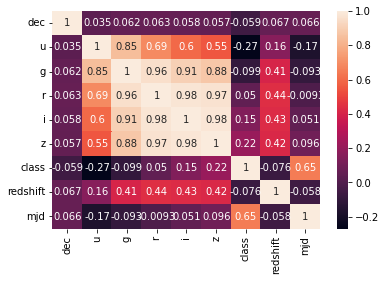

In [ ]:
df_train.drop(['specobjid','fiberid','objid','run','rerun','camcol', 'field','plate','ra'],axis=1,inplace=True) #Droping the irrelevant attribute
sns.heatmap(df_train.corr(),annot = True)
plt.show()

In [ ]:
#Seperating the target variable "class" from the set of the dataset 
X = df_train.drop('class',axis=1) 
y = df_train['class']
#Splitting the dataset into the training and test data(20% of the total dataset)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
parameters_list = {'max_depth':np.arange(1,15),'min_samples_leaf':np.arange(2,10)}
all_decision_trees = GridSearchCV(DecisionTreeClassifier(),parameters_list)
all_decision_trees.fit(X,y)

##Using the best parameters
y_pred = all_decision_trees.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9925


In [ ]:
df_train.columns

Index(['dec', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift', 'mjd'], dtype='object')

In [ ]:
X = df_train[['mjd', 'z']]
y = df_train['class']
#Splitting the dataset into the training and test data(20% of the total dataset)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

parameters_list = {'max_depth':np.arange(1,15),'min_samples_leaf':np.arange(2,10)}
all_decision_trees = GridSearchCV(DecisionTreeClassifier(),parameters_list)
all_decision_trees.fit(X,y)

##Using the best parameters
y_pred = all_decision_trees.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.862


In [ ]:
X = df_train[['u', 'g', 'dec', 'redshift']]
y = df_train['class']
#Splitting the dataset into the training and test data(20% of the total dataset)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

parameters_list = {'max_depth':np.arange(1,15),'min_samples_leaf':np.arange(2,10)}
all_decision_trees = GridSearchCV(DecisionTreeClassifier(),parameters_list)
all_decision_trees.fit(X,y)

##Using the best parameters
y_pred = all_decision_trees.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.995


## References
    - https://github.com/benedekrozemberczki/awesome-gradient-boosting-papers
    - https://github.com/talperetz/awesome-gradient-boosting